### LOGISTIC REGRESSION - HEART DISEASE PREDICTION
Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are 
considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### There are no categorical features


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Null values present but  not much

In [7]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


### DId not found high correlation between target and Data

# Handling Null values

In [8]:
def fill_cigs_per_day(row):
    if pd.isna(row["cigsPerDay"]) and row["currentSmoker"] == 1:
        return 1
    elif pd.isna(row["cigsPerDay"]) and row["currentSmoker"] == 0:
        return 0
    else:
        return row["cigsPerDay"]

df["cigsPerDay"] = df.apply(fill_cigs_per_day, axis=1)

In [9]:
df[df["BPMeds"] == 1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
13,0,41,3.0,0,0.0,1.0,0,1,0,332.0,124.0,88.0,31.31,65.0,84.0,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
158,0,49,3.0,0,0.0,1.0,0,1,0,254.0,191.0,124.5,28.35,78.0,54.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,56,2.0,0,0.0,1.0,0,1,0,260.0,158.0,102.5,26.89,90.0,88.0,0
4158,0,69,2.0,0,0.0,1.0,0,1,0,220.0,143.0,81.0,26.27,60.0,77.0,0
4168,0,62,1.0,0,0.0,1.0,0,1,0,325.0,180.0,108.0,35.16,75.0,81.0,0
4194,1,65,1.0,1,20.0,1.0,0,1,0,246.0,179.0,96.0,19.34,95.0,76.0,1


In [10]:
def fill_bp_meds(row):
    if pd.isna(row["BPMeds"]) and row["prevalentHyp"] == 1:
        return 1
    elif pd.isna(row["BPMeds"]) and row["prevalentHyp"] == 0:
        return 0
    else:
        return row["BPMeds"]

df["BPMeds"] = df.apply(fill_bp_meds, axis=1)

In [11]:
df["education"].fillna(df["education"].mean(),inplace = True)

In [12]:
df["totChol"].fillna(df["totChol"].mean(),inplace = True)
df["BMI"].fillna(df["BMI"].mean(),inplace = True)
df["heartRate"].fillna(df["heartRate"].mean(),inplace = True)
sum1 = 0
sum2 = 0
count1 = 0
count2 = 0

sum1 = df[df["diabetes"] == 1]["glucose"].sum()
count1 = df[df["diabetes"] == 1]["glucose"].count()
sum2 = df[df["diabetes"] == 0]["glucose"].sum()
count2 = df[df["diabetes"] == 0]["glucose"].count()
mean_glucose_0 = sum2/count2
mean_glucose_1 = sum1/count1

def fill_glucose(row):
    if pd.isna(row["glucose"]) and row["diabetes"] == 0:
        return mean_glucose_0
    elif pd.isna(row["glucose"]) and row["diabetes"] == 1:
        return mean_glucose_1
    else:
        return row["glucose"]
df["glucose"] = df.apply(fill_glucose,axis=1)

In [13]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Checking for Outliers

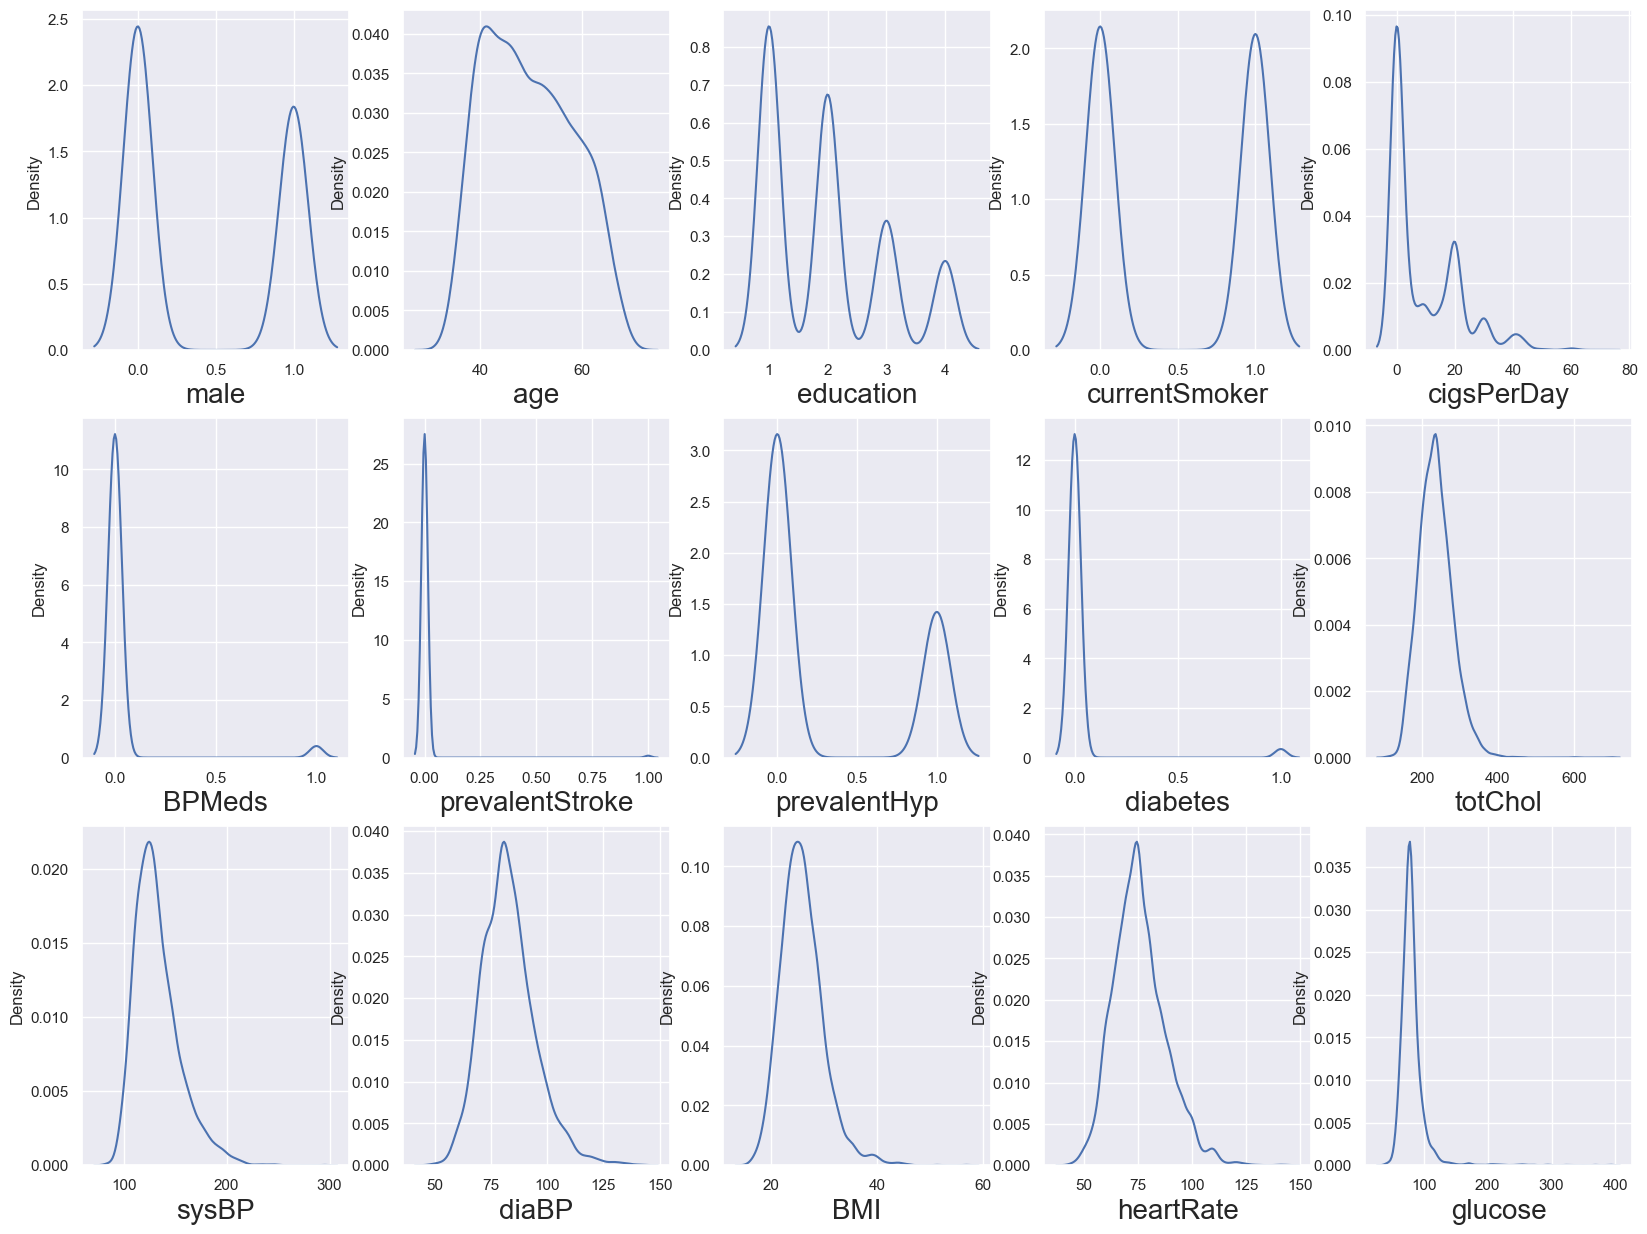

In [15]:
pltnum = 1
sns.set(rc ={"figure.figsize":(20,15)})
for i in df:
    if pltnum<=15:
        ax = plt.subplot(3,5,pltnum)
        sns.kdeplot(df[i])
        pltnum += 1
        plt.xlabel(i,fontsize = 20)
plt.show()

### Outliers present in glucose , heartRate , BMI , totChol, sysBp , cigsPerDay

<Axes: >

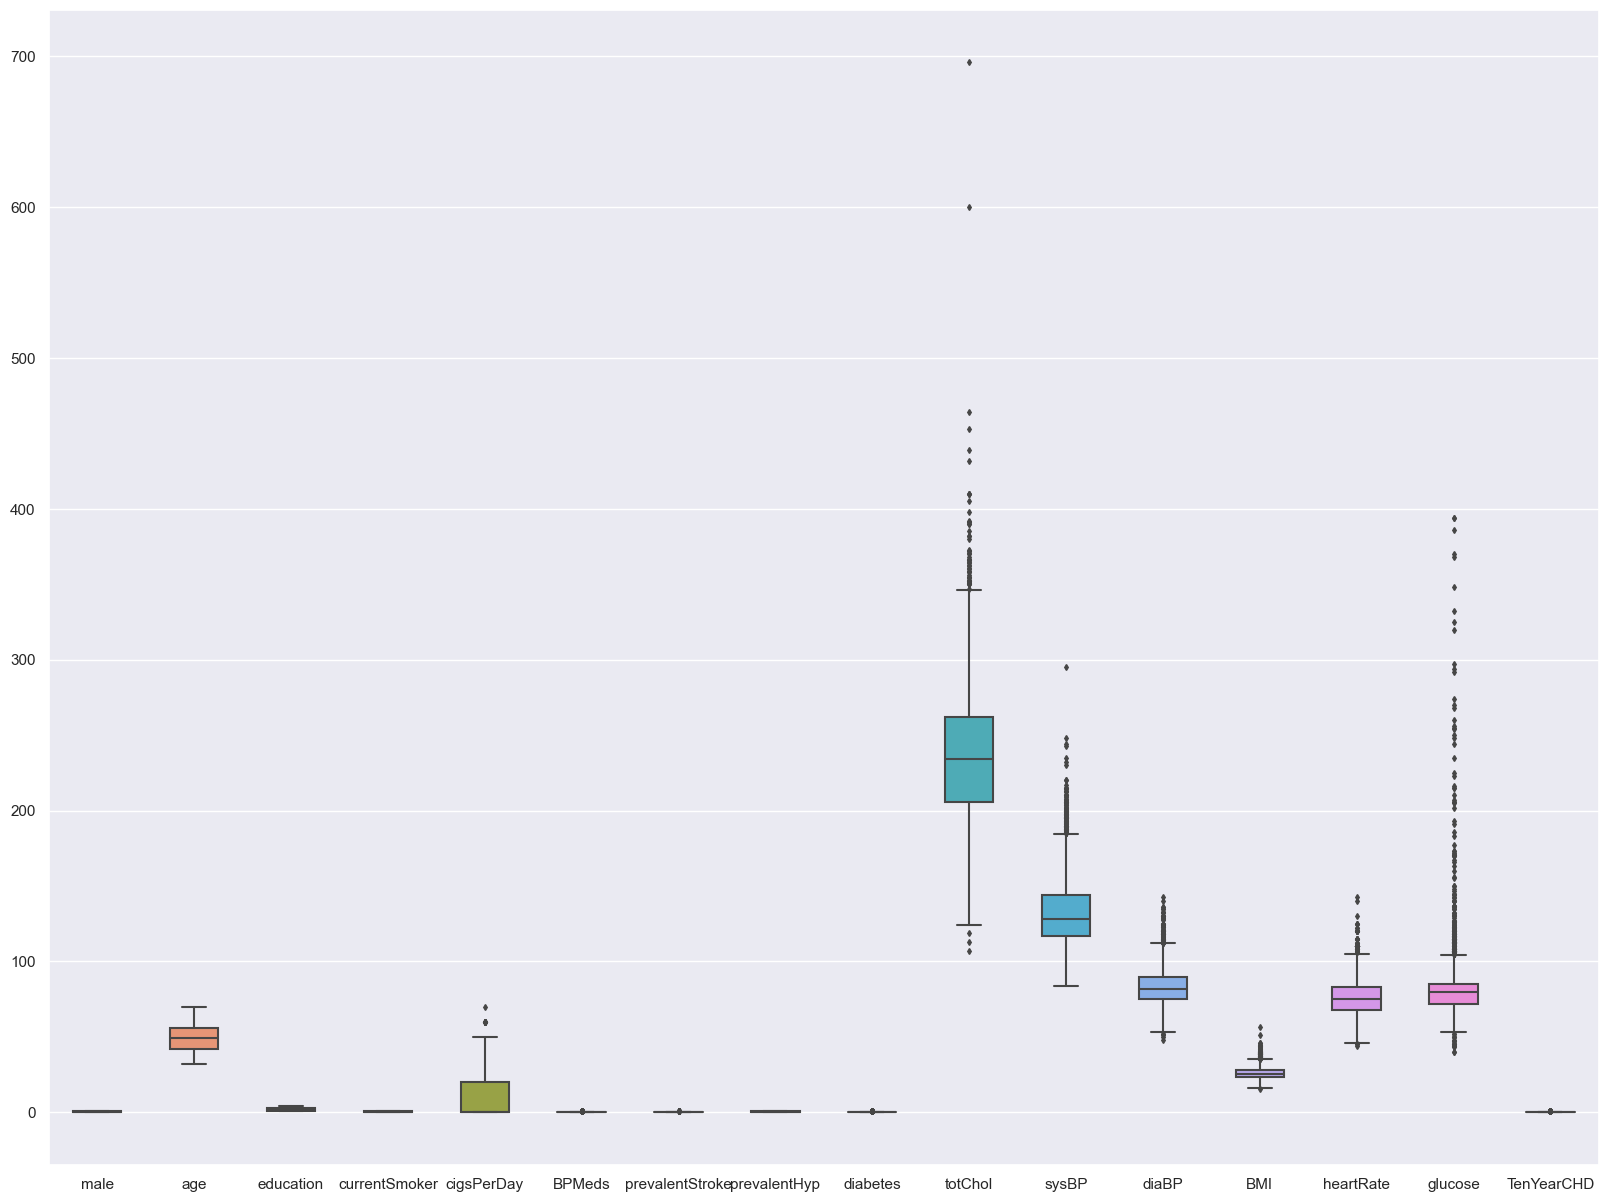

In [16]:
fig,ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = df,ax = ax,width = 0.5 , fliersize=3)

# Treating Outliers by LogTransformation

In [17]:
columns = ["totChol","sysBP","diaBP","BMI","heartRate","glucose"]

for i in columns:
    df[i] = np.log(df[i])


In [18]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805,0
1,0,46,2.0,0,0.0,0.0,0,0,0,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733,0
2,1,48,1.0,1,20.0,0.0,0,0,0,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495,0
3,0,61,3.0,1,30.0,0.0,0,1,0,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729,1
4,0,46,3.0,1,23.0,0.0,0,0,0,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,5.746203,5.187386,4.521789,3.256942,4.189655,4.454347,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,5.332719,4.840242,4.382027,2.981126,4.174387,4.219508,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,5.513429,4.875197,4.276666,3.091042,4.430817,4.454347,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,5.347108,4.840242,4.465908,2.952825,4.454347,4.375621,0


<Axes: >

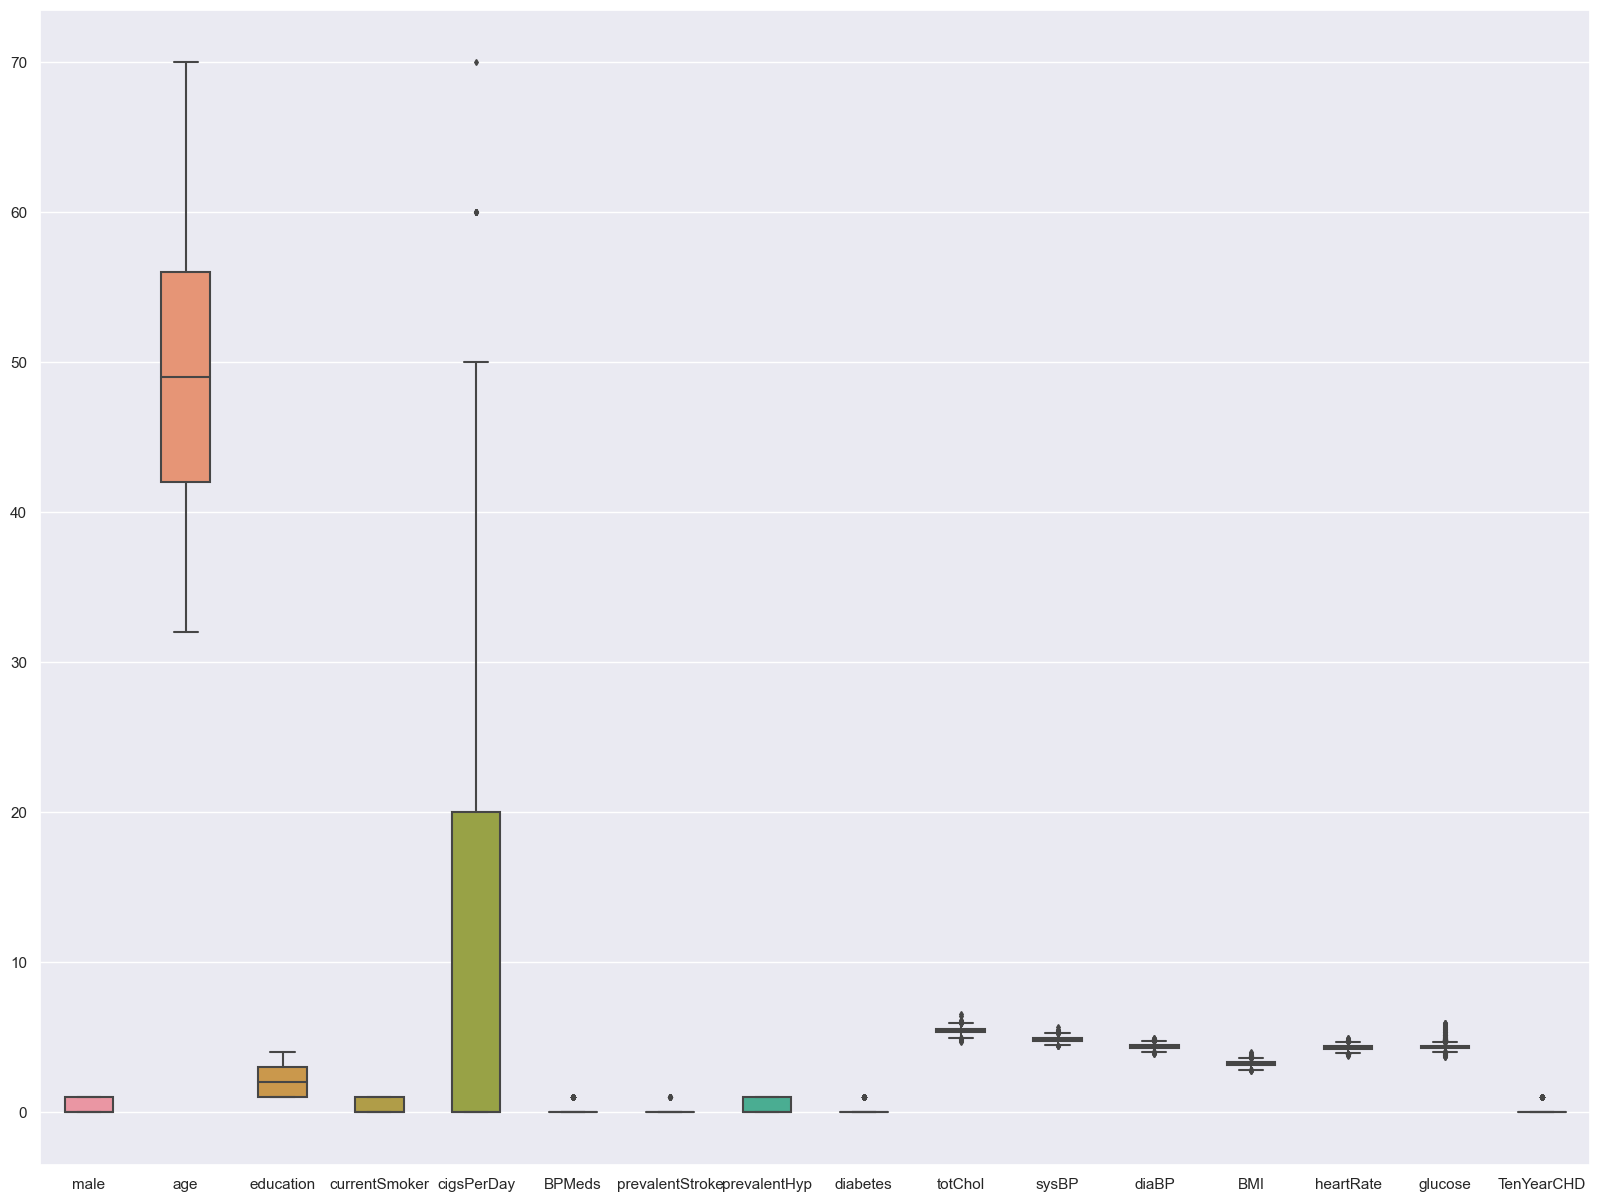

In [19]:
fig,ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = df,ax = ax,width = 0.5 , fliersize=3)

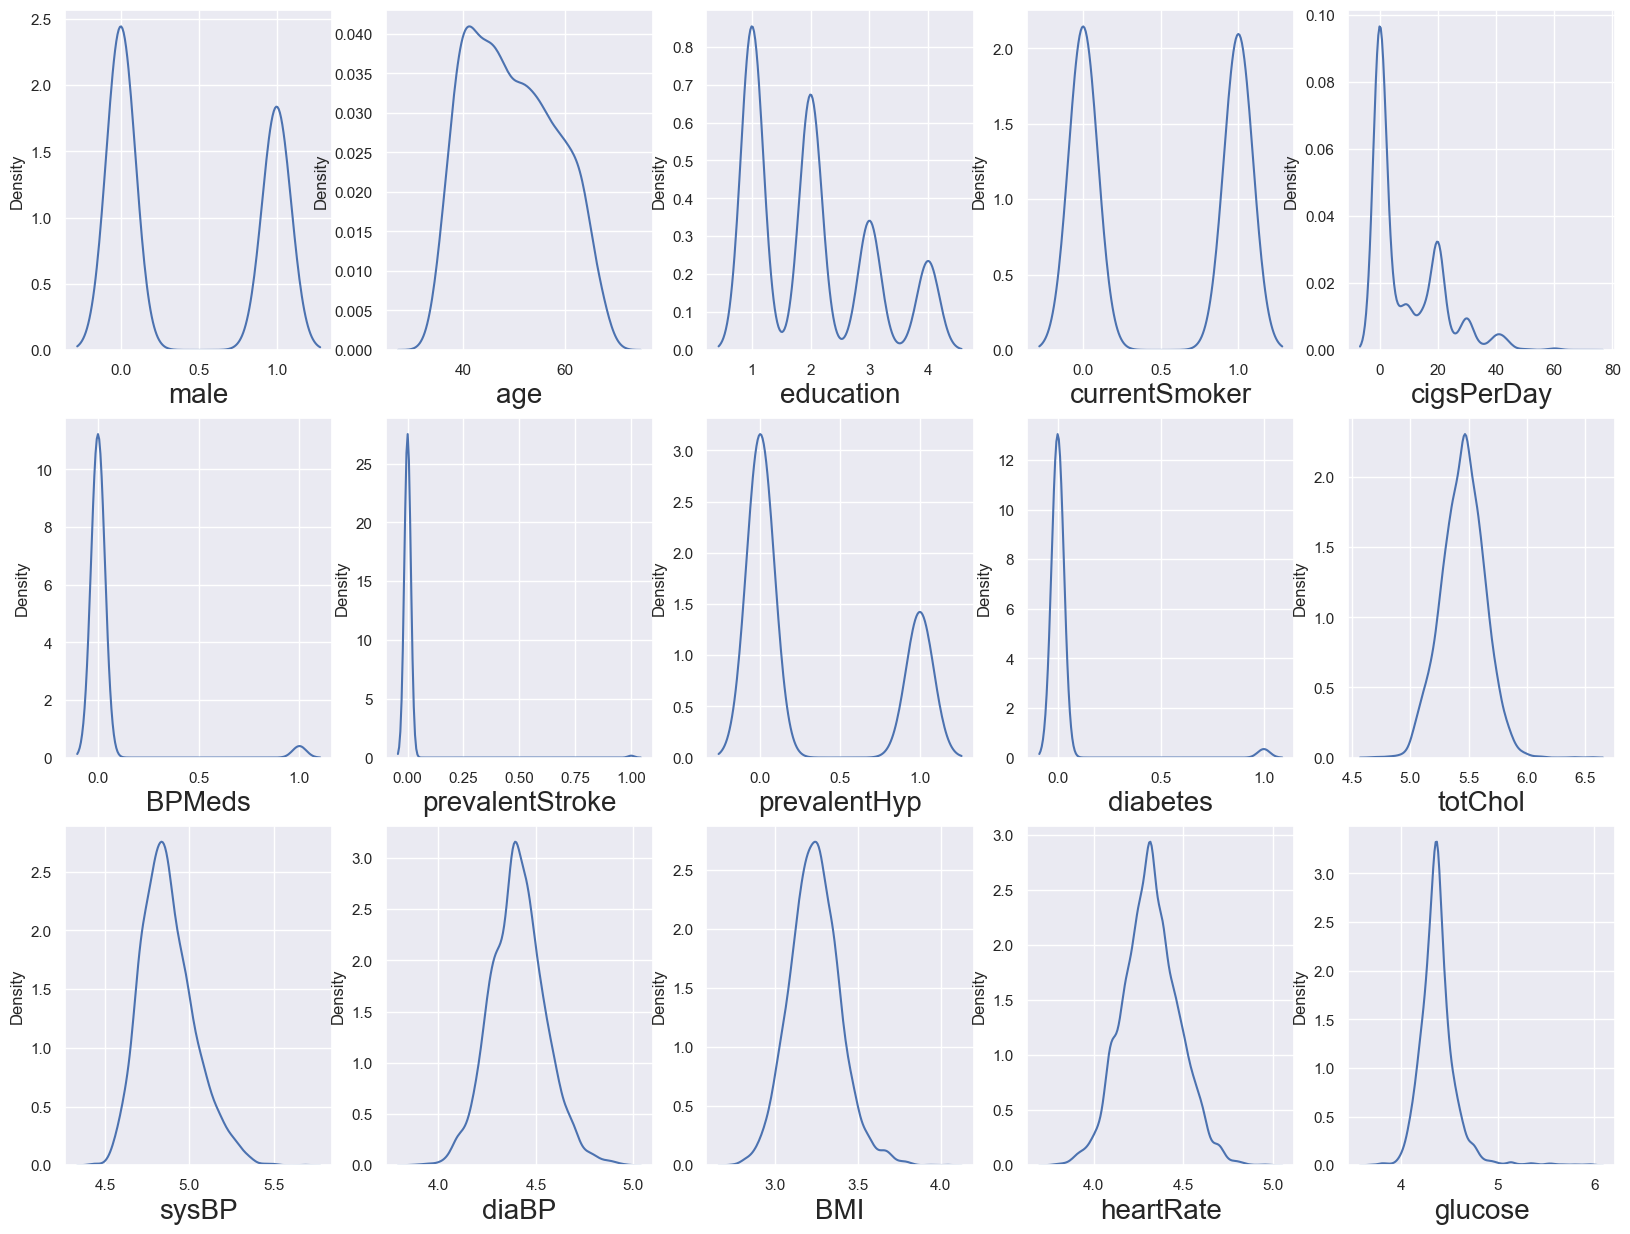

In [39]:
pltnum = 1
sns.set(rc ={"figure.figsize":(20,15)})
for i in df:
    if pltnum<=15:
        ax = plt.subplot(3,5,pltnum)
        sns.kdeplot(df[i])
        pltnum += 1
        plt.xlabel(i,fontsize = 20)
plt.show()

# Independent And Dependent Features

In [20]:
X = df.iloc[:,:-1]

In [21]:
y = df.iloc[:,-1]

In [22]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805
1,0,46,2.0,0,0.0,0.0,0,0,0,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733
2,1,48,1.0,1,20.0,0.0,0,0,0,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495
3,0,61,3.0,1,30.0,0.0,0,1,0,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729
4,0,46,3.0,1,23.0,0.0,0,0,0,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,5.746203,5.187386,4.521789,3.256942,4.189655,4.454347
4234,1,51,3.0,1,43.0,0.0,0,0,0,5.332719,4.840242,4.382027,2.981126,4.174387,4.219508
4235,0,48,2.0,1,20.0,0.0,0,0,0,5.513429,4.875197,4.276666,3.091042,4.430817,4.454347
4236,0,44,1.0,1,15.0,0.0,0,0,0,5.347108,4.840242,4.465908,2.952825,4.454347,4.375621


In [23]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

# TrainTestSplit

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [26]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3673,1,48,1.97895,1,60.0,0.0,0,0,0,5.446737,4.912655,4.394449,3.251537,4.382027,4.356709
3393,1,62,1.00000,0,0.0,0.0,0,0,0,5.056246,4.867534,4.465908,3.357942,4.276666,3.850148
3053,0,54,3.00000,0,0.0,0.0,0,0,0,5.627621,4.848116,4.418841,3.138966,4.143135,4.356709
3713,1,42,1.00000,0,0.0,0.0,0,0,0,5.488938,4.795791,4.382027,3.326115,4.276666,4.375621
3838,0,65,1.00000,0,0.0,1.0,0,1,0,5.834811,5.126936,4.590057,3.172622,4.317488,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.00000,1,5.0,0.0,0,1,0,5.402677,4.990433,4.543295,3.288029,4.330733,4.262680
466,0,57,3.00000,1,15.0,0.0,0,0,0,5.521461,4.828314,4.304065,3.048325,4.382027,4.276666
3092,0,60,2.00000,0,0.0,0.0,0,1,0,5.697093,4.890349,4.488636,3.222469,4.418841,4.394449
3772,1,39,2.00000,1,10.0,0.0,0,0,0,5.370638,4.624973,4.166665,3.198673,4.219508,4.127134


In [27]:
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3188,1,63,1.0,0,0.0,0.0,0,1,0,5.247024,4.997212,4.499810,3.300640,4.276666,4.454347
764,1,45,3.0,0,0.0,0.0,0,0,0,5.087596,4.828314,4.488636,3.331490,4.442651,4.418841
3264,0,51,1.0,1,2.0,0.0,0,0,0,5.564520,4.844187,4.394449,3.007661,4.317488,4.564348
1967,1,45,3.0,1,30.0,0.0,0,0,0,5.521461,4.836282,4.494239,3.356200,4.317488,4.521789
2185,0,45,2.0,1,3.0,0.0,0,0,0,5.521461,4.867534,4.382027,3.007661,4.499810,4.454347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,0,56,2.0,0,0.0,0.0,0,1,0,5.407172,4.969813,4.465908,3.079614,4.276666,4.521789
4212,1,48,2.0,1,43.0,0.0,0,1,0,5.342334,4.969813,4.477337,3.371082,4.430817,4.094345
3422,0,66,1.0,0,0.0,0.0,0,1,0,5.560682,5.117994,4.564348,3.368674,4.174387,4.406719
3703,1,42,2.0,1,30.0,0.0,0,0,0,5.645447,4.976734,4.553877,3.315276,4.317488,4.430817


# ModelTraining

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [32]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
log_pred = log_reg.predict(X_test)

# Accuracy

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(log_pred,y_test)
accuracy

0.860614724803431

# Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test , log_pred)
confusion

array([[1186,    8],
       [ 187,   18]], dtype=int64)

In [37]:
TP = confusion[0][0]
FN = confusion[1][0]
TN = confusion[1][1]
FP = confusion[0][1]

In [38]:
accuracy = (TP + TN)/(TP + FP + TN + FN)
precision = (TP)/(TP + FP)
recall = (TP)/(TP + FN)
F1 = 2*(recall*precision)/(recall + precision)

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1_score : {F1}")

Accuracy : 0.860614724803431
Precision : 0.9932998324958124
Recall : 0.8638018936635106
F1_score : 0.9240358395013635
